In [2]:
import pandas as pd

# GroupBy

Allows us to split the data into groups (which become series) and then you can do an operation on each series, which then get combined back together.

In [11]:
hornsby = pd.read_csv("data/rainfall/hornsby_pool.csv")
hornsby[["Year", "Month", "Rainfall amount (millimetres)"]].groupby(["Year", "Month"]).max()


Rainfall amount (millimetres)
Year Month                               
2008 1                                NaN
     2                               33.8
     3                               51.2
     4                               23.6
     5                                1.4
...                                   ...
2021 11                               NaN
     12                              25.4
2022 1                               26.0
     2                               91.0
     3                              116.4

[171 rows x 1 columns]

# Exercise - ground averages

Create a table showing the average scores at each venue in the AFL.  You will find the data you need in `data/afl/games/csv`.

# Pivoting

[The official documentation is quite good on this matter](https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping) so we will focus here on concret examples.


In [17]:
hornsby = pd.read_csv("data/rainfall/hornsby_pool.csv")
only_2022 = hornsby["Year"] == 2022
hornsby[only_2022][["Day", "Month", "Rainfall amount (millimetres)"]]


,Day,Month,Rainfall amount (millimetres)
5114,1,1,0.0
5115,2,1,0.0
5116,3,1,0.0
5117,4,1,0.6
5118,5,1,5.8
...,...,...,...
5190,18,3,0.2
5191,19,3,28.4
5192,20,3,4.2
5193,21,3,0.0


In [21]:
hornsby[only_2022][["Day", "Month", "Rainfall amount (millimetres)"]].pivot(index="Day", columns="Month")

Rainfall amount (millimetres)             
Month                             1     2      3
Day                                             
1                               0.0   0.0   14.0
2                               0.0  11.2   53.0
3                               0.0   9.4  108.0
4                               0.6   0.4   41.8
5                               5.8  10.8    9.4
6                              25.6   1.6   34.6
7                               1.6  23.8   60.4
8                              21.0  10.0   87.8
9                              12.8   0.2  116.4
10                              2.4   0.0    0.0
11                              0.0   9.0    0.0
12                              0.0  11.6    0.0
13                             26.0  12.0    0.0
14                              8.6   0.2    1.0
15                              0.2   0.0    1.6
16                              5.4   0.0   11.2
17                              0.0   0.0    0.2
18                              0.2  20.4    0.2
19                             25.6   5.8   28.4
20                              6.4   0.0    4.2
21                              3.2   0.0    0.0
22                              3.0  40.6    0.0
23                              1.0  91.0    NaN
24                              1.0  13.6    NaN
25                              0.0  27.8    NaN
26                              0.0  49.6    NaN
27                              0.0  13.2    NaN
28                              0.0   2.8    NaN
29                              0.0   NaN    NaN
30                              0.0   NaN    NaN
31                              0.0   NaN    NaN

In [22]:
hornsby[["Day", "Year", "Month", "Rainfall amount (millimetres)"]].pivot(index=["Year","Day"], columns="Month")

Rainfall amount (millimetres)                                       \
Month                               1     2    3    4    5     6    7    8    
Year Day                                                                      
2008 1                             NaN   NaN  0.0  0.0  0.0   0.0  0.0  0.0   
     2                             NaN   NaN  0.0  0.0  0.0  21.0  0.0  0.2   
     3                             NaN   NaN  0.0  0.0  0.0  13.6  0.0  0.0   
     4                             NaN   NaN  0.0  0.0  0.0  12.0  0.2  0.0   
     5                             NaN   NaN  0.0  0.0  0.0  79.2  1.4  0.0   
...                                ...   ...  ...  ...  ...   ...  ...  ...   
2022 27                            0.0  13.2  NaN  NaN  NaN   NaN  NaN  NaN   
     28                            0.0   2.8  NaN  NaN  NaN   NaN  NaN  NaN   
     29                            0.0   NaN  NaN  NaN  NaN   NaN  NaN  NaN   
     30                            0.0   NaN  NaN  NaN  NaN   NaN  NaN  NaN   
     31                            0.0   NaN  NaN  NaN  NaN   NaN  NaN  NaN   

                              
Month      9    10   11   12  
Year Day                      
2008 1    0.4  0.0  0.0  0.0  
     2    0.0  0.0  1.8  0.0  
     3    0.0  0.0  1.4  0.0  
     4    0.6  6.6  0.6  0.0  
     5    2.0  7.8  0.0  0.0  
...       ...  ...  ...  ...  
2022 27   NaN  NaN  NaN  NaN  
     28   NaN  NaN  NaN  NaN  
     29   NaN  NaN  NaN  NaN  
     30   NaN  NaN  NaN  NaN  
     31   NaN  NaN  NaN  NaN  

[465 rows x 12 columns]

You will fairly quickly read the limit of this version.  If there is more than one index/column value, the pivot will fail.  If you want to _aggregate all the values that fit a pairing_ you will need the `pivot_table` method.

In [23]:
olympics = pd.read_excel("data/fun.xlsx", "athlete_events")


In [24]:
olympics

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1724,Aristidis Akratopoulos,M,NaN,NaN,NaN,Greece,GRE,1896 Summer,1896,Summer,Athina,Tennis,Tennis Men's Singles,NaN
1,1724,Aristidis Akratopoulos,M,NaN,NaN,NaN,Greece-3,GRE,1896 Summer,1896,Summer,Athina,Tennis,Tennis Men's Doubles,NaN
2,1725,"Konstantinos ""Kostas"" Akratopoulos",M,NaN,NaN,NaN,Greece,GRE,1896 Summer,1896,Summer,Athina,Tennis,Tennis Men's Singles,NaN
3,1725,"Konstantinos ""Kostas"" Akratopoulos",M,NaN,NaN,NaN,Greece-3,GRE,1896 Summer,1896,Summer,Athina,Tennis,Tennis Men's Doubles,NaN
4,4113,Anastasios Andreou,M,NaN,NaN,NaN,Greece,GRE,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's 110 metres Hurdles,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135528,Marc Zwiebler,M,32.0,181.0,75.0,Germany,GER,2016 Summer,2016,Summer,Rio de Janeiro,Badminton,Badminton Men's Singles,NaN
271112,135547,Viktoriya Viktorovna Zyabkina,F,23.0,174.0,62.0,Kazakhstan,KAZ,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 100 metres,NaN
271113,135547,Viktoriya Viktorovna Zyabkina,F,23.0,174.0,62.0,Kazakhstan,KAZ,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 200 metres,NaN
271114,135547,Viktoriya Viktorovna Zyabkina,F,23.0,174.0,62.0,Kazakhstan,KAZ,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 4 x 100 metres Relay,NaN


In [25]:
olympics.pivot_table(values="Age", index="Name",columns="Games")

Games,1896 Summer,1900 Summer,1904 Summer,1906 Summer,1908 Summer,1912 Summer,1920 Summer,1924 Summer,1924 Winter,1928 Summer,...,1998 Winter,2000 Summer,2002 Winter,2004 Summer,2006 Winter,2008 Summer,2010 Winter,2012 Summer,2014 Winter,2016 Summer
Name,,,,,,,,,,,,,,,,,,,,,
"Gabrielle Marie ""Gabby"" Adcock (White-)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0
Eleonora Margarida Josephina Scmitt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jean Hauptmanns,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Luis ngel Fernando de los Santos Grossi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Th Anh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zge Krdar emberci,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,NaN,NaN
zlem Kaya,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,NaN,26.0
zman Graud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Games'>

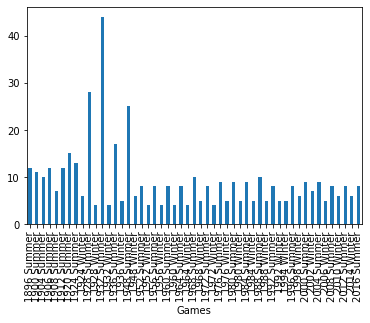

In [39]:
olympics[olympics["Games"] == "1912 Summer"]
summ = olympics.pivot_table(values="Age", index="Name",columns="Games", aggfunc=len)
summ.max().plot(kind="bar")

# Exercise - ufo sightings

Advanced - you will need to use the more advanced `pivot_table` method and you might have to do some type conversion(s).  Can you create a table from the "ufo" tab of the "fun.xlsx" which has a column for each shape of ufo that and which contains the sum of the durations of each states sightings in those shape categories.

Note: if you can't work out what I mean above, please experiment with any pivot on the ufo data that you think is meaningful.

In [41]:
ufos = pd.read_excel("data/fun.xlsx", "ufo")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   datetime              80332 non-null  object        
 1   city                  80332 non-null  object        
 2   state                 74535 non-null  object        
 3   country               70662 non-null  object        
 4   shape                 78400 non-null  object        
 5   duration (seconds)    80332 non-null  object        
 6   duration (hours/min)  80331 non-null  object        
 7   comments              80316 non-null  object        
 8   date posted           80332 non-null  datetime64[ns]
 9   latitude              80332 non-null  object        
 10  longitude             80332 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 6.7+ MB


In [44]:
ufos

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,2004-04-27,29.883056,-97.941111
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.38421,-98.581082
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.2,-2.916667
3,1956-10-10 21:00:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.978333,-96.645833
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.418056,-157.803611
...,...,...,...,...,...,...,...,...,...,...,...
80327,2013-09-09 21:15:00,nashville,tn,us,light,600,10 minutes,Round from the distance/slowly changing colors...,2013-09-30,36.165833,-86.784444
80328,2013-09-09 22:00:00,boise,id,us,circle,1200,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,2013-09-30,43.613611,-116.202500
80329,2013-09-09 22:00:00,napa,ca,us,other,1200,hour,Napa UFO&#44,2013-09-30,38.297222,-122.284444
80330,2013-09-09 22:20:00,vienna,va,us,circle,5,5 seconds,Saw a five gold lit cicular craft moving fastl...,2013-09-30,38.901111,-77.265556


In [45]:
ufos.pivot_table(values="duration (seconds)", columns="shape", index="state", aggfunc=sum)

shape,changed,changing,chevron,cigar,circle,cone,crescent,cross,cylinder,delta,...,light,other,oval,pyramid,rectangle,round,sphere,teardrop,triangle,unknown
state,,,,,,,,,,,,,,,,,,,,,
ab,NaN,8640.0,302.0,19942.0,18845.0,7925.0,NaN,3600.0,4535.0,NaN,...,79561.0,12002.0,302805.0,NaN,1980.0,NaN,15785.0,2280.0,19756.0,19928.0
ak,NaN,27420.0,NaN,1905.0,460033.0,40.0,NaN,NaN,3360.0,NaN,...,162936.0,25193.0,621159.0,NaN,1810.0,NaN,28971.0,180.0,54227.0,30539.0
al,NaN,27440.0,538.0,5002.0,49513.0,900.0,NaN,10800.0,3008.0,NaN,...,151224.0,67389.0,25970.0,NaN,11420.0,NaN,47430.0,182710.0,47675.0,113936.0
ar,NaN,29125.0,810.3,54300.0,59997.0,2700.0,NaN,1922.0,6818.0,NaN,...,66400141.0,75630.2,102761.0,NaN,696.0,NaN,21075.0,28081.0,43818.0,231534.0
az,NaN,129778.0,22593.0,32532.0,628505.0,14242.0,NaN,2115.0,43227.0,NaN,...,2761373.5,7986973.1,129013.0,NaN,15110.0,NaN,225795.0,14103.0,281731.5,548622.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wi,NaN,17572.0,4210.0,20557.0,119111.0,5880.0,37800.0,4380.0,8358.0,NaN,...,366050.0,83742.8,45436.0,NaN,8354.0,NaN,75434.0,7135.0,55193.0,1344089.5
wv,NaN,13530.0,3682.0,3530.0,37349.0,180.0,NaN,780.0,19032.0,NaN,...,118254.0,39872.0,11564.0,NaN,667.0,NaN,9214.0,1170.0,22180.0,24277.0
wy,NaN,7070.0,433.0,62.0,18771.0,NaN,NaN,NaN,2580.0,NaN,...,108488.0,156258.0,21146.0,NaN,1205.0,NaN,35575.0,600.0,5228.0,3083.0


In [47]:
ufos[ufos["state"] == "ab"]

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
29,1979-10-10 22:00:00,saddle lake (canada),ab,NaN,triangle,270,4.5 or more min.,Lights far above&#44 that glance; then flee f...,2005-01-19,53.970571,-111.689885
496,1966-10-01 19:00:00,edmonton (30 mi. east of&#44 hwy 16 east) (can...,ab,ca,diamond,300,5 min,Unusual ights in distance. Approached until ob...,2001-08-05,53.55,-113.500000
1425,2012-10-13 20:00:00,calgary (canada),ab,ca,light,120,120 seconds,Bright light seen over calgary se,2012-10-30,51.083333,-114.083333
1627,2010-10-14 01:00:00,lesser slave lake (canada),ab,NaN,rectangle,60,1 min,ufo landed,2010-11-21,55.431256,-115.603896
1635,2010-10-14 22:05:00,calgary (canada),ab,ca,other,20,20 seckonds,ASTRONOMER REPORT: 3 objects in the night sky...,2010-11-21,51.083333,-114.083333
...,...,...,...,...,...,...,...,...,...,...,...
79576,2005-09-06 21:00:00,calgary (canada),ab,ca,oval,600,10 min.,OBJECTS HAD A STRANGE WHITE WITH INTERNAL RED ...,2005-10-11,51.083333,-114.083333
79583,2005-09-06 23:00:00,whitecourt (canada),ab,ca,light,5,5 seconds,From the East I saw 4 lights streaking across ...,2005-10-11,54.133333,-115.683333
79884,1993-09-08 23:30:00,edmonton (canada),ab,ca,cigar,18000,4-5 hours,Lots of different ufo sightings and unexplaina...,2014-01-16,53.55,-113.500000
80037,2011-09-08 18:00:00,spruce grove (canada),ab,ca,light,600,10 min.,very bright colors&#44 and multiple colors&#44...,2011-10-10,53.533333,-113.916667
